# Intro to Artificial Neural Network
In this notebook we would create our very first multi-layer perceptron (mlp) using the keras package. <br>
We shall then simulate an XOR problem and solve it using our own mlp

In [1]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

%config InLineBackend.figure_format = 'svg' #magic code that gets svg rendered graphics. makes the plot nicer

Using TensorFlow backend.


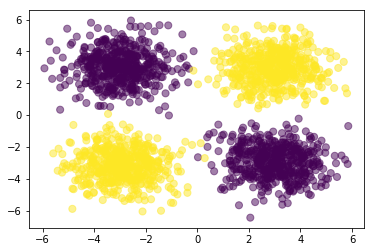

In [2]:
#Generating the XOR Distribution
Sample = 500
# Creating 4 gaussian clouds
X1 = np.random.randn(Sample,2) + np.array([3,-3])
X2 = np.random.randn(Sample,2) + np.array([-3,3])
X3 = np.random.randn(Sample,2) + np.array([3,3])
X4 = np.random.randn(Sample,2) + np.array([-3,-3])

X = np.vstack([X1,X2,X3,X4])

#For colouring
Y = np.array([0] * Sample *2 + [1] * Sample*2)

# plotting
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha = 0.5)
plt.show()

In [3]:
# Creating your mlp
n_input = 2
n_hidden = 10
n_output = 2

#Instantiating the model 
model = Sequential()

#Adding the layers
model.add(Dense(n_hidden, activation='sigmoid', input_dim=n_input))
model.add(Dense(n_output, activation='sigmoid'))

model.compile(loss=keras.losses.mean_squared_error, 
              optimizer=keras.optimizers.Adam(lr=0.01),
             metrics = ["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
X

array([[ 2.89140559, -2.99144019],
       [ 3.5845913 , -2.53040489],
       [ 0.6505609 , -3.52730982],
       ..., 
       [-3.19694198, -3.13273334],
       [-2.60352107, -4.05516702],
       [-4.49050209, -4.46118213]])

In [5]:
Y_out = keras.utils.to_categorical(Y,num_classes=2)

In [6]:
# Training
print(X.shape)
print(Y_out.shape)

model.fit(X,Y_out,
         epochs = 100,
         batch_size = 128)

(2000, 2)
(2000, 2)
Epoch 1/100
2000/2000 [==============================] - 1s 656us/step - loss: 0.2604 - acc: 0.6015
Epoch 2/100
2000/2000 [==============================] - 0s 55us/step - loss: 0.2470 - acc: 0.5340
Epoch 3/100
2000/2000 [==============================] - 0s 51us/step - loss: 0.2416 - acc: 0.7170
Epoch 4/100
2000/2000 [==============================] - 0s 55us/step - loss: 0.2339 - acc: 0.7290
Epoch 5/100
2000/2000 [==============================] - 0s 52us/step - loss: 0.2215 - acc: 0.8745
Epoch 6/100
2000/2000 [==============================] - 0s 55us/step - loss: 0.2032 - acc: 0.9540
Epoch 7/100
2000/2000 [==============================] - 0s 49us/step - loss: 0.1788 - acc: 0.9725
Epoch 8/100
2000/2000 [==============================] - 0s 55us/step - loss: 0.1505 - acc: 0.9790
Epoch 9/100
2000/2000 [==============================] - 0s 48us/step - loss: 0.1216 - acc: 0.9835
Epoch 10/100
2000/2000 [==============================] - 0s 52us/step - loss: 0.0958 - 

2000/2000 [==============================] - 0s 17us/step - loss: 0.0042 - acc: 0.9970
Epoch 83/100
2000/2000 [==============================] - 0s 13us/step - loss: 0.0041 - acc: 0.9975
Epoch 84/100
2000/2000 [==============================] - 0s 18us/step - loss: 0.0041 - acc: 0.9975
Epoch 85/100
2000/2000 [==============================] - 0s 25us/step - loss: 0.0040 - acc: 0.9975
Epoch 86/100
2000/2000 [==============================] - 0s 18us/step - loss: 0.0040 - acc: 0.9975
Epoch 87/100
2000/2000 [==============================] - 0s 18us/step - loss: 0.0040 - acc: 0.9975
Epoch 88/100
2000/2000 [==============================] - 0s 15us/step - loss: 0.0039 - acc: 0.9975
Epoch 89/100
2000/2000 [==============================] - 0s 12us/step - loss: 0.0039 - acc: 0.9970
Epoch 90/100
2000/2000 [==============================] - 0s 19us/step - loss: 0.0038 - acc: 0.9970
Epoch 91/100
2000/2000 [==============================] - 0s 17us/step - loss: 0.0039 - acc: 0.9970
Epoch 92/100


(10000, 2)
(10000,)


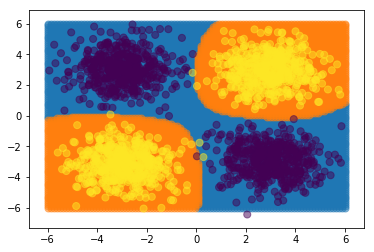

In [7]:
input_space = []
temp = np.linspace(-6,6,100)
for i in temp:
    for j in temp:
        input_space.append([i,j])
input_space = np.array(input_space)
print(input_space.shape)
Y_hat = model.predict(input_space)
pred = Y_hat.argmax(axis=1)
print(pred.shape)
zero_space = input_space[pred == 0]
one_space = input_space[pred == 1]
plt.scatter(zero_space[:,0], zero_space[:,1],s = 50, alpha = 0.5)
plt.scatter(one_space[:,0], one_space[:,1],s = 50, alpha = 0.5)
plt.scatter(X[:,0],X[:,1], s = 50, c = Y, alpha = 0.5)
plt.show()